In [2]:
import re
import os
import time
import random
import json
import requests
import gensim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
from math import floor
from copy import deepcopy
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [3]:
from keys import alpha_vantage_api

In [4]:
f='''AAR Corp. AIR	Aerospace & Defense	
$44.12
2.98%
12.57%
147.94
Aerojet Rocketdyne Holdings Inc AJRD	Aerospace & Defense	
$44.02
25.53%
21.39%
20.13
AeroVironment Inc. AVAV	Aerospace & Defense	
$64.11
-19.92%
18.14%
42.37
AgEagle Aerial Systems Inc. UAVS	Aerospace & Defense	
$0.64
-10.81%
2.70%
n/a
Air Industries Group AIRI	Aerospace & Defense	
$1.22
23.73%
-33.07%
n/a

American Outdoor Brands Corp AOBC	Aerospace & Defense	
$8.74
-28.24%
-1.45%
29.54
Astronics Corp. ATRO	Aerospace & Defense	
$29.04
-10.20%
-9.02%
21.56
Astrotech Corp ASTC	Aerospace & Defense	
$2.03
-25.00%
-4.03%
n/a
Axon Enterprise Inc AAXN	Aerospace & Defense	
$73.78
69.77%
25.89%
86.77
Boeing Co. BA	Aerospace & Defense	
$358.94
7.97%
25.44%
18.07

BWX Technologies Inc BWXT	Aerospace & Defense	
$59.55
34.48%
16.77%
16.85
Cae Inc. CAE	Aerospace & Defense	
$26.94
34.15%
16.92%
23.49
CPI Aerostructures Inc CVU	Aerospace & Defense	
$6.85
-1.43%
-10.97%
27.34
Cubic Corp. CUB	Aerospace & Defense	
$59.63
-2.24%
2.50%
42.17
Curtiss-Wright Corp. CW	Aerospace & Defense	
$136.60
24.97%
14.80%
16.41

Ducommun Inc. DCO	Aerospace & Defense	
$48.27
24.60%
14.07%
46.87
Elbit Systems Ltd. ESLT	Aerospace & Defense	
$164.37
35.53%
25.19%
23.73
Esco Technologies, Inc. ESE	Aerospace & Defense	
$87.24
25.77%
20.36%
25.62
Flir Systems, Inc. FLIR	Aerospace & Defense	
$52.84
18.27%
13.03%
21.62
General Dynamics Corp. GD	Aerospace & Defense	
$179.34
0.45%
6.68%
14.06

General Electric Co. GE	Aerospace & Defense	
$11.27
50.79%
-12.50%
n/a
Heico Corp. HEI	Aerospace & Defense	
$128.44
53.85%
19.48%
44.20
Hexcel Corp. HXL	Aerospace & Defense	
$79.34
30.16%
14.27%
18.45
Huntington Ingalls Industries Inc HII	Aerospace & Defense	
$250.21
18.46%
20.01%
9.97
Innovative Solutions And Support Inc ISSC	Aerospace & Defense	
$4.53
115.82%
9.04%
n/a

Kaman Corp. KAMN	Aerospace & Defense	
$63.76
13.44%
11.88%
29.22
Kratos Defense & Security Solutions Inc KTOS	Aerospace & Defense	
$17.79
35.79%
28.93%
n/a
KVH Industries, Inc. KVHI	Aerospace & Defense	
$11.35
1.60%
-1.83%
n/a
L3Harris Technologies Inc LHX	Aerospace & Defense	
$195.25
42.68%
25.52%
24.07
Lockheed Martin Corp. LMT	Aerospace & Defense	
$387.35
33.15%
18.29%
14.88

Mantech International Corp - Ordinary Shares - Class A MANT	Aerospace & Defense	
$77.43
39.68%
23.18%
25.39
Maxar Technologies Inc MAXR	Aerospace & Defense	
$10.92
-35.34%
n/a
n/a
MICT Inc MICT	Aerospace & Defense	
$0.94
148.80%
-23.24%
n/a
Motorola Solutions Inc MSI	Aerospace & Defense	
$164.93
29.20%
22.78%
20.48
Park Aerospace Corp PKE	Aerospace & Defense	
$16.08
17.58%
2.16%
56.24

Rada Electronic Industries RADA	Aerospace & Defense	
$5.15
80.73%
17.39%
265.98
Raytheon Co. RTN	Aerospace & Defense	
$216.10
26.11%
17.32%
15.12
ShotSpotter Inc SSTI	Aerospace & Defense	
$23.75
-35.63%
n/a
n/a
SIFCO Industries Inc. SIF	Aerospace & Defense	
$2.60
-45.15%
-38.91%
n/a
Spirit Aerosystems Holdings Inc - Ordinary Shares - Class A SPR	Aerospace & Defense	
$86.41
6.83%
15.55%
12.75

Tat Technologies TATT	Aerospace & Defense	
$5.45
-18.17%
-2.65%
n/a
Teledyne Technologies Inc TDY	Aerospace & Defense	
$341.43
52.28%
26.05%
22.48
Textron Inc. TXT	Aerospace & Defense	
$46.20
-17.49%
2.03%
9.46
Transdigm Group Incorporated TDG	Aerospace & Defense	
$561.57
65.10%
29.26%
37.62
Triumph Group Inc. TGI	Aerospace & Defense	
$27.28
65.79%
-15.85%
n/a

Virgin Galactic Holdings Inc - Ordinary Shares - Class A SPCE	Aerospace & Defense	
$7.48
-27.14%
n/a
78.62
Virgin Galactic Holdings Inc - Units (1 Ord Class A & 1/3 War) SPCEU	Aerospace & Defense	
$7.89
-24.04%
n/a
80.42
VSE Corp. VSEC	Aerospace & Defense	
$40.54
41.19%
-5.32%
9.32
Wireless Telecom Group, Inc. WTT	Aerospace & Defense	
$1.31
-23.78%
-12.14%
1106.25'''

In [5]:
stocks=[]
for i in f.split('\n'):
    if i!='':
        
        if 'Aerospace' in i:
            print(i)
            stocks.append(i)
print(len(stocks))

AAR Corp. AIR	Aerospace & Defense	
Aerojet Rocketdyne Holdings Inc AJRD	Aerospace & Defense	
AeroVironment Inc. AVAV	Aerospace & Defense	
AgEagle Aerial Systems Inc. UAVS	Aerospace & Defense	
Air Industries Group AIRI	Aerospace & Defense	
American Outdoor Brands Corp AOBC	Aerospace & Defense	
Astronics Corp. ATRO	Aerospace & Defense	
Astrotech Corp ASTC	Aerospace & Defense	
Axon Enterprise Inc AAXN	Aerospace & Defense	
Boeing Co. BA	Aerospace & Defense	
BWX Technologies Inc BWXT	Aerospace & Defense	
Cae Inc. CAE	Aerospace & Defense	
CPI Aerostructures Inc CVU	Aerospace & Defense	
Cubic Corp. CUB	Aerospace & Defense	
Curtiss-Wright Corp. CW	Aerospace & Defense	
Ducommun Inc. DCO	Aerospace & Defense	
Elbit Systems Ltd. ESLT	Aerospace & Defense	
Esco Technologies, Inc. ESE	Aerospace & Defense	
Flir Systems, Inc. FLIR	Aerospace & Defense	
General Dynamics Corp. GD	Aerospace & Defense	
General Electric Co. GE	Aerospace & Defense	
Heico Corp. HEI	Aerospace & Defense	
Hexcel Corp. HXL	Aerospa

In [6]:

stock_label=re.findall("[A-Z]{2,5}\t", ' '.join(stocks))
len(stock_label)

49

In [38]:
symbol='AJRD'
call='https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={}&outputsize=full&apikey={}'.format(symbol,alpha_vantage_api)
testy=requests.get(call).json()
testydf=pd.DataFrame(testy['Time Series (Daily)']).transpose()

In [48]:
testydf.loc[testydf['7. dividend amount']!='0.0000']

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2004-05-20,10.7800,11.3200,10.5000,11.2800,11.2800,418300,0.0300,1.0000
2004-02-11,11.3100,11.3300,11.2500,11.3200,11.2900,450600,0.0300,1.0000
2003-10-30,9.5900,9.6000,9.4200,9.4200,9.3702,95200,0.0300,1.0000
2003-07-30,9.1000,9.3500,8.7300,9.3500,9.2710,133900,0.0300,1.0000
2003-04-29,7.4300,7.5500,7.4000,7.4300,7.3437,90100,0.0300,1.0000
2003-02-13,7.1400,7.1800,7.1000,7.1700,7.0582,141000,0.0300,1.0000
2002-10-30,7.8000,8.2000,7.7200,8.1800,8.0189,239000,0.0300,1.0000
2002-07-30,10.5500,11.1100,10.5400,11.0100,10.7537,343400,0.0300,1.0000
2002-04-29,15.4600,15.7500,15.1000,15.3200,14.9227,247300,0.0300,1.0000
2002-02-07,10.5500,11.0500,10.5500,10.6500,10.3536,159100,0.0300,1.0000


In [47]:
testydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5035 entries, 2019-12-02 to 1999-11-29
Data columns (total 8 columns):
1. open                 5035 non-null object
2. high                 5035 non-null object
3. low                  5035 non-null object
4. close                5035 non-null object
5. adjusted close       5035 non-null object
6. volume               5035 non-null object
7. dividend amount      5035 non-null object
8. split coefficient    5035 non-null object
dtypes: object(8)
memory usage: 514.0+ KB


In [53]:
budget=pd.read_csv('yearly_budget',index_col=0)

(0, 0.8)

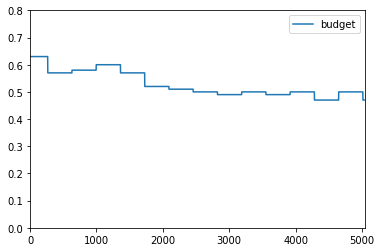

In [60]:
budget.plot()
plt.ylim(0,.8)

In [10]:
stock_labels=[k[:-1] for k in stock_label]

In [77]:
stock_labels

['AIR',
 'AJRD',
 'AVAV',
 'UAVS',
 'AIRI',
 'AOBC',
 'ATRO',
 'ASTC',
 'AAXN',
 'BA',
 'BWXT',
 'CAE',
 'CVU',
 'CUB',
 'CW',
 'DCO',
 'ESLT',
 'ESE',
 'FLIR',
 'GD',
 'GE',
 'HEI',
 'HXL',
 'HII',
 'ISSC',
 'KAMN',
 'KTOS',
 'KVHI',
 'LHX',
 'LMT',
 'MANT',
 'MAXR',
 'MICT',
 'MSI',
 'PKE',
 'RADA',
 'RTN',
 'SSTI',
 'SIF',
 'SPR',
 'TATT',
 'TDY',
 'TXT',
 'TDG',
 'TGI',
 'SPCE',
 'SPCEU',
 'VSEC',
 'WTT']

In [12]:
driver=webdriver.Chrome()

In [8]:
def tril_bil_mil(numasstr):
    if numasstr[-1]=='T':
        cap=float(numasstr[:-1])*1000000000000
    elif numasstr[-1]=='B':
        cap=float(numasstr[:-1])*1000000000
    elif numasstr[-1]=='M':
        cap=float(numasstr[:-1])*1000000
    else:
        cap=17
    return cap

In [13]:
mkt_cap=[]
for symbol_ in stock_labels:
    print(symbol_)
    try:
        url='https://finance.yahoo.com/quote/'
        driver.get(url+symbol_)
        cap=driver.find_element_by_xpath('//*[@id="quote-summary"]/div[2]/table/tbody/tr[1]/td[2]/span').text
        print(tril_bil_mil(cap))
        mkt_cap.append(tril_bil_mil(cap))
    except:
        print('Something Went Wrong')
        mkt_cap.append(0)
    

AIR
1529000000.0
AJRD
3443000000.0
AVAV
1529000000.0
UAVS
9445000.0
AIRI
38865000.0
AOBC
472016000.0
ATRO
869867000.0
ASTC
11771000.0
AAXN
4375000000.0
BA
199892000000.0
BWXT
5618000000.0
CAE
7067000000.0
CVU
81107000.0
CUB
1869000000.0
CW
5764000000.0
DCO
550524000.0
ESLT
7274000000.0
ESE
2251000000.0
FLIR
7058000000.0
GD
51494000000.0
GE
97466000000.0
HEI
14600000000.0
HXL
6647000000.0
HII
10227000000.0
ISSC
75245000.0
KAMN
1773000000.0
KTOS
1881000000.0
KVHI
207387000.0
LHX
42946000000.0
LMT
108208000000.0
MANT
3102000000.0
MAXR
665556000.0
MICT
10183000.0
MSI
28277000000.0
PKE
329107000.0
RADA
198953000.0
RTN
59611000000.0
SSTI
273585000.0
SIF
14563000.0
SPR
8880000000.0
TATT
48952000.0
TDY
12252000000.0
TXT
10509000000.0
TDG
29804000000.0
TGI
1353000000.0
SPCE
1458000000.0
SPCEU
Something Went Wrong
VSEC
440190000.0
WTT
29850000.0


In [14]:
mkt_capfix=mkt_cap[:-3]
mkt_capfix+=mkt_cap[-2:]
mkt_cap=mkt_capfix

In [15]:
stock_labelsfix=stock_labels[:-3]
stock_labelsfix+=stock_labels[-2:]
stock_labels=stock_labelsfix

In [50]:
#create list of days to iterate through 
sdate = date(2005, 4, 10)   # start date
edate = date(2019, 12, 2)   # end date
delta = edate - sdate       # as timedelta
days=[sdate + timedelta(days=i) for i in range(delta.days + 1)]
# print(days)

In [176]:
tet=pd.DataFrame(days)
tet.index=pd.DatetimeIndex(days)
tet.drop(0,axis=1,inplace=True)

In [22]:
tet=pd.DataFrame()

In [67]:
tet.head()

""
2005-04-10
2005-04-11
2005-04-12
2005-04-13
2005-04-14


In [36]:
tet1=pd.merge(tet,testydf['5. adjusted close'], how='left',left_on=tet.index,right_on=testydf.index)

In [48]:
symbol_=stock_labels[0]
stonk_cap=mkt_cap[0]
testydf.index=pd.DatetimeIndex(testydf.index)
testydf=testydf[::-1]
tot_shares=stonk_cap/float(testydf['5. adjusted close'][-1])
testydf['adj_{}'.format(symbol_)]=testydf['5. adjusted close'].map(lambda u:float(u)*tot_shares)
tet.join(testydf['adj_{}'.format(symbol_)], how='left', on=tet.index)

,adj_AIR
2005-04-10,NaN
2005-04-11,1.767784e+10
2005-04-12,1.848072e+10
2005-04-13,1.868836e+10
2005-04-14,1.866068e+10
...,...
2019-01-27,NaN
2019-01-28,5.604702e+10
2019-01-29,5.554536e+10
2019-01-30,5.613815e+10


In [46]:
stonk_cap

1529000000.0

In [55]:
testydf['5. adjusted close'].tail()

2019-11-25    44.7700
2019-11-26    44.9900
2019-11-27    44.9400
2019-11-29    44.6900
2019-12-02    43.7300
Name: 5. adjusted close, dtype: object

In [54]:
testydf=testydf[::-1]

In [56]:
tot_shares=stonk_cap/float(testydf['5. adjusted close'][-1])

34964555.225245826

In [44]:
tet.join(testydf['adj_{}'.format(symbol_)], how='left', on=tet.index)

,adj_AIR
2005-04-10,NaN
2005-04-11,1.767784e+10
2005-04-12,1.848072e+10
2005-04-13,1.868836e+10
2005-04-14,1.866068e+10
...,...
2019-01-27,NaN
2019-01-28,5.604702e+10
2019-01-29,5.554536e+10
2019-01-30,5.613815e+10


In [223]:
# testydf=pd.DataFrame(testy['Time Series (Weekly)']).transpose()
# stonk_cap=mkt_cap[0]
# testydf.index=pd.DatetimeIndex(testydf.index)
testy

{'Meta Data': {'1. Information': 'Weekly Adjusted Prices and Volumes',
  '2. Symbol': 'BWXT',
  '3. Last Refreshed': '2019-12-03 11:29:33',
  '4. Time Zone': 'US/Eastern'},
 'Weekly Adjusted Time Series': {'2019-12-03': {'1. open': '60.0600',
   '2. high': '60.3600',
   '3. low': '58.2200',
   '4. close': '58.3000',
   '5. adjusted close': '58.3000',
   '6. volume': '287842',
   '7. dividend amount': '0.0000'},
  '2019-11-29': {'1. open': '60.6200',
   '2. high': '61.1725',
   '3. low': '60.0600',
   '4. close': '60.1300',
   '5. adjusted close': '60.1300',
   '6. volume': '889835',
   '7. dividend amount': '0.0000'},
  '2019-11-22': {'1. open': '61.3300',
   '2. high': '61.9300',
   '3. low': '60.1400',
   '4. close': '60.5000',
   '5. adjusted close': '60.5000',
   '6. volume': '1913763',
   '7. dividend amount': '0.1700'},
  '2019-11-15': {'1. open': '60.4300',
   '2. high': '61.8400',
   '3. low': '60.3500',
   '4. close': '61.5000',
   '5. adjusted close': '61.3285',
   '6. volume

In [216]:
tet=pd.DataFrame(days)
tet.index=pd.DatetimeIndex(days)
tet.drop(0,axis=1,inplace=True)
for i,row in caps[:25].iterrows():
    time.sleep(12)
    print(row['symbol'])
#     row['symbol']
#     row['mkt_cap']
    call='https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol={}&outputsize=full&apikey={}'.format(row['symbol'],alpha_vantage_api)
    testy=requests.get(call).json()
    testydf=pd.DataFrame(testy['Time Series (Daily)']).transpose()
    # stonk_cap=mkt_cap[0]
    testydf.index=pd.DatetimeIndex(testydf.index)
    testydf['5. adjusted close']=testydf['5. adjusted close'].astype(float)
    tot_shares=row['mkt_cap']/float(testydf['5. adjusted close'][0])
    testydf['adj_{}'.format(row['symbol'])]=testydf['5. adjusted close'].map(lambda u:float(u)*tot_shares)
    tet=tet.join(testydf['adj_{}'.format(row['symbol'])], how='left', on=tet.index)

BA
LMT
GE
RTN
GD
LHX
TDG
MSI
HEI
TDY
TXT
HII
SPR
ESLT
CAE
FLIR
HXL
CW
BWXT
AAXN
AJRD
MANT
ESE
KTOS
CUB


In [210]:
tet=pd.DataFrame(days)
tet.index=pd.DatetimeIndex(days)
tet.drop(0,axis=1,inplace=True)
row=caps.loc[10]
call='https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={}&outputsize=full&apikey={}'.format(row['symbol'],alpha_vantage_api)
testy=requests.get(call).json()
testydf=pd.DataFrame(testy['Time Series (Daily)']).transpose()
    # stonk_cap=mkt_cap[0]
testydf.index=pd.DatetimeIndex(testydf.index)
testydf['5. adjusted close']=testydf['5. adjusted close'].astype(float)
tot_shares=row['mkt_cap']/float(testydf['5. adjusted close'][0])
testydf['adj_{}'.format(row['symbol'])]=testydf['5. adjusted close'].map(lambda u:float(u)*tot_shares)
tet=tet.join(testydf['adj_{}'.format(row['symbol'])], how='left', on=tet.index)

In [199]:
testydf['5. adjusted close'][0]

58.98

In [209]:
caps.loc[10]

symbol          BWXT
mkt_cap    5.618e+09
Name: 10, dtype: object

In [211]:
symbol_

'BWXT'

In [200]:
testydf['5. adjusted close']

15.4684

In [219]:
tet.to_csv('aero_stock_mkt_cap')

In [197]:
testydf.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2019-12-02,60.0600,60.3600,58.9700,58.9800,58.98,222622,0.0000,1.0000
2019-11-29,60.6500,60.7700,60.0600,60.1300,60.13,121687,0.0000,1.0000
2019-11-27,60.9200,61.0000,60.6600,60.7900,60.79,212545,0.0000,1.0000
2019-11-26,60.2700,61.0600,60.2700,60.8500,60.85,285583,0.0000,1.0000
2019-11-25,60.6200,61.1725,60.4000,60.4600,60.46,270020,0.0000,1.0000


In [195]:
testydf['5. adjusted close']=testydf['5. adjusted close'].astype(float)

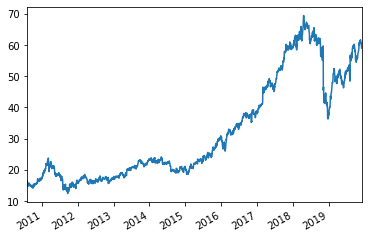

In [196]:
testydf['5. adjusted close'].plot()

In [ ]:
stonks=[]
adj_mkt_cap=pd.DataFrame(days)
for symbol_,stonk_cap in zip(stock_labels,mkt_cap):
    print(symbol_)
    try:
        call='https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={}&outputsize=full&apikey={}'.format(symbol_,alpha_vantage_api)
        testy=requests.get(call).json()
        testydf=pd.DataFrame(testy['Time Series (Daily)']).transpose()
        stonks.append(testydf)
        adj_col=testydf['5. adjusted close']*stonk_cap
        adj_mkt_cap
    except:
        print('Something Went Wrong')
        stonks.append(0)

In [123]:
caps=pd.DataFrame([stock_labels,mkt_cap]).transpose()

In [126]:
caps.columns= ['symbol','mkt_cap']

In [132]:
caps=caps.sort_values(by='mkt_cap',ascending=False)

In [215]:
caps

,symbol,mkt_cap
9,BA,1.99892e+11
29,LMT,1.08208e+11
20,GE,9.7466e+10
36,RTN,5.9611e+10
19,GD,5.1494e+10
28,LHX,4.2946e+10
43,TDG,2.9804e+10
33,MSI,2.8277e+10
21,HEI,1.46e+10
41,TDY,1.2252e+10


In [224]:
# https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=demo
symbol_=stock_labels[10]
stonk_cap=mkt_cap[10]
call='https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol={}&outputsize=full&apikey={}'.format(symbol_,alpha_vantage_api)
testy=requests.get(call).json()
# testydf=pd.DataFrame(testy['Time Series (Weekly)']).transpose()
# stonk_cap=mkt_cap[0]
# testydf.index=pd.DatetimeIndex(testydf.index)

In [231]:
weekly_returns=pd.DataFrame(testy['Weekly Adjusted Time Series']).transpose()
weekly_returns.index=pd.DatetimeIndex(weekly_returns.index)

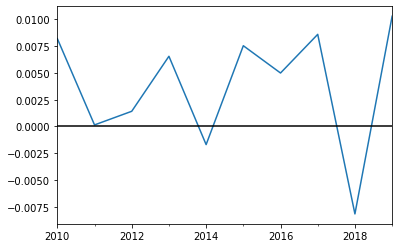

In [248]:
weekly_returns['5. adjusted close'].astype(float)[::-1].pct_change()
plt.axhline(0, color='black')
plt.axvline(0, color='white')

In [255]:
symbol_

'BWXT'

In [249]:
weekly_returns=pd.DataFrame(testy['Weekly Adjusted Time Series']).transpose()
weekly_returns.index=pd.DatetimeIndex(weekly_returns.index)
weekly_returns['5. adjusted close'].astype(float)[::-1].pct_change()

2010-08-13         NaN
2010-08-20    0.064912
2010-08-27   -0.002131
2010-09-03   -0.039726
2010-09-10   -0.021351
                ...   
2019-11-08    0.045050
2019-11-15    0.008031
2019-11-22   -0.013509
2019-11-29   -0.006116
2019-12-03   -0.027274
Name: 5. adjusted close, Length: 487, dtype: float64

In [265]:
tet=pd.DataFrame(days)
tet.index=pd.DatetimeIndex(days)
tet.drop(0,axis=1,inplace=True)
for i,row in caps[:30].iterrows():
    time.sleep(12)
    print(row['symbol'])
#     row['symbol']
#     row['mkt_cap']
    call='https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={}&outputsize=full&apikey={}'.format(row['symbol'],alpha_vantage_api)
    testy=requests.get(call).json()
    daily_returns=pd.DataFrame(testy['Time Series (Daily)']).transpose()
    daily_returns.index=pd.DatetimeIndex(daily_returns.index)
    daily_returns['5. adjusted close'].astype(float)[::-1]
    daily_returns['adj_{}'.format(row['symbol'])]=daily_returns['5. adjusted close'].astype(float)[::-1]
    tet=tet.join(daily_returns['adj_{}'.format(row['symbol'])], how='left', on=tet.index)
    tet['adj_{}'.format(row['symbol'])]=tet['adj_{}'.format(row['symbol'])].fillna(method='ffill').pct_change()

BA
LMT
GE
RTN
GD
LHX
TDG
MSI
HEI
TDY
TXT
HII
SPR
ESLT
CAE
FLIR
HXL
CW
BWXT
AAXN
AJRD
MANT
ESE
KTOS
CUB
KAMN
AVAV
AIR
SPCE
TGI


In [261]:
tet

2005-04-10         NaN
2005-04-11         NaN
2005-04-12    0.011250
2005-04-13    0.000000
2005-04-14   -0.013743
                ...   
2019-11-28    0.000000
2019-11-29   -0.000597
2019-11-30    0.000000
2019-12-01    0.000000
2019-12-02   -0.013509
Name: adj_MSI, Length: 5350, dtype: float64

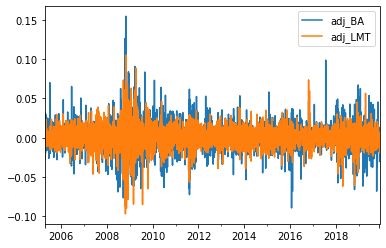

In [264]:
tet.plot()

In [266]:
tet.to_csv('Aero_returns')

In [267]:
tet.head()

,adj_BA,adj_LMT,adj_GE,adj_RTN,adj_GD,adj_LHX,adj_TDG,adj_MSI,adj_HEI,adj_TDY,...,adj_AJRD,adj_MANT,adj_ESE,adj_KTOS,adj_CUB,adj_KAMN,adj_AVAV,adj_AIR,adj_SPCE,adj_TGI
2005-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-12,-0.015993,-0.002249,0.007538,-0.003851,-0.002705,-0.004860,NaN,0.011250,0.013745,0.034688,...,0.001921,0.020935,-0.001715,0.000778,0.005080,0.002984,NaN,0.045417,NaN,0.000000
2005-04-13,0.003764,-0.002577,-0.012472,-0.011586,-0.005147,-0.018317,NaN,0.000000,-0.028122,-0.027139,...,-0.031640,0.010255,-0.017172,-0.027195,-0.039899,-0.030551,NaN,0.011235,NaN,-0.027601
2005-04-14,-0.008692,-0.015174,-0.003926,-0.016156,-0.006301,-0.005283,NaN,-0.013743,-0.026895,-0.028553,...,-0.007921,-0.050342,-0.025404,0.007987,-0.023674,-0.052261,NaN,-0.001481,NaN,0.000000
